In [ ]:
%%capture
!pip3 install torch==2.2.0

In [ ]:
%%capture
!pip install bertopic datasets accelerate openai tiktoken langdetect

In [ ]:
import pandas as pd
import numpy as np
import torch
import pickle
import openai
import bertopic
import tiktoken
from datetime import datetime
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired
from bertopic.representation import OpenAI
import bisect
from tqdm import tqdm
from langdetect import detect

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
loading_dir='/content/drive/MyDrive/Topic Mining Project/new_data/'

In [ ]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, data_dir):
        self.raw_data = pd.read_csv(data_dir)
        self.raw_data['description'].fillna('', inplace=True)
        self.raw_data = self.raw_data[self.raw_data['tickers'].notna()]
        self.raw_data.dropna(subset=['title', 'publishedDate'], inplace=True)
        self.raw_data['is_english'] = self.raw_data['description'].apply(Dataset.is_english)
        self.raw_data = self.raw_data[self.raw_data['is_english']]

    @staticmethod
    def is_english(text):
        try:
            return detect(text) == 'en'
        except:
            return False



    def __len__(self):
        return len(self.raw_data)

    def __getitem__(self, i):

        text = self.raw_data['title'].iloc[i] + ' | ' + self.raw_data['description'].iloc[i]
        timestamps = self.raw_data['publishedDate'].iloc[i].split('T')[0]
        tickers=self.raw_data['tickers'].iloc[i]

        return text, timestamps, tickers


print("loading data...")
dataset = Dataset(loading_dir+'news_data/news_with_ticker.csv')
len(dataset)

loading data...


318342

In [ ]:
documents = [dataset[i][0] for i in range(len(dataset))]
timestamp = [dataset[i][1] for i in range(len(dataset))]

In [ ]:
all_dates=sorted(np.unique(timestamp))
doc_chunks = [documents[bisect.bisect_left(timestamp, date):bisect.bisect_right(timestamp, date)] for date in all_dates]
date_chunks = [timestamp[bisect.bisect_left(timestamp, date):bisect.bisect_right(timestamp, date)] for date in all_dates]


In [ ]:
print('update model using data from: ',all_dates[-1])

update model using data from:  2024-04-16


# merge model

In [ ]:
# first model nday=10
from umap import UMAP
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from bertopic import BERTopic

vectorizer_model=CountVectorizer(stop_words="english")
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)
kmeans_model = KMeans(n_clusters=50)

topic_models=[]
for i,docs in enumerate(doc_chunks):

  topic_models.append(BERTopic(
        vectorizer_model=vectorizer_model,
        umap_model=umap_model,
        hdbscan_model=kmeans_model,
        verbose=False,
        ))

  topic_models[i].fit(docs)
  topic_models[i].save(loading_dir+"model_data/model_"+all_dates[i], serialization="pickle")
  print(i)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2024-04-18 19:27:48,834 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


0


2024-04-18 19:28:18,414 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


1


2024-04-18 19:28:46,618 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


2


2024-04-18 19:29:22,134 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


3


2024-04-18 19:30:10,508 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


4


2024-04-18 19:31:00,129 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


5


2024-04-18 19:31:17,106 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


6


2024-04-18 19:31:52,119 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


7


2024-04-18 19:32:17,809 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


8


2024-04-18 19:32:46,157 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


9


2024-04-18 19:33:20,288 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


10


2024-04-18 19:33:52,249 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


11


2024-04-18 19:34:24,577 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


12


2024-04-18 19:34:53,785 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


13


2024-04-18 19:35:26,115 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


14


2024-04-18 19:35:54,292 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


15


2024-04-18 19:36:24,233 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


16


2024-04-18 19:36:52,068 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


17


2024-04-18 19:37:25,052 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


18


2024-04-18 19:37:57,071 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


19


2024-04-18 19:38:30,259 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


20


2024-04-18 19:38:59,625 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


21


2024-04-18 19:39:27,159 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


22


2024-04-18 19:39:57,732 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


23


2024-04-18 19:40:28,120 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


24


2024-04-18 19:40:59,747 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


25


2024-04-18 19:41:27,984 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


26


2024-04-18 19:41:59,520 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


27


2024-04-18 19:42:28,506 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


28


2024-04-18 19:43:03,551 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


29


2024-04-18 19:43:35,172 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


30


2024-04-18 19:44:02,901 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


31


2024-04-18 19:44:20,309 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


32


2024-04-18 19:44:40,076 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


33


2024-04-18 19:44:58,527 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


34


2024-04-18 19:45:16,697 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


35


2024-04-18 19:45:49,785 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


36


2024-04-18 19:46:07,205 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


37


2024-04-18 19:46:40,521 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


38


2024-04-18 19:47:12,637 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


39


2024-04-18 19:47:29,363 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


40


2024-04-18 19:47:49,631 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


41


2024-04-18 19:48:07,843 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


42


2024-04-18 19:48:42,216 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


43


2024-04-18 19:49:03,380 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


44


2024-04-18 19:49:26,672 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


45


2024-04-18 19:49:46,893 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


46


2024-04-18 19:50:21,546 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


47


2024-04-18 19:50:49,580 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


48


2024-04-18 19:51:19,757 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


49


2024-04-18 19:51:44,750 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


50


2024-04-18 19:52:15,794 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


51


2024-04-18 19:52:44,432 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


52


2024-04-18 19:53:14,370 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


53


2024-04-18 19:53:44,614 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


54


2024-04-18 19:54:06,584 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


55


2024-04-18 19:54:30,619 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


56


2024-04-18 19:54:51,973 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


57


2024-04-18 19:55:10,815 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


58


2024-04-18 19:55:23,174 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


59


2024-04-18 19:55:48,022 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


60


2024-04-18 19:56:04,176 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


61


2024-04-18 19:56:36,548 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


62


2024-04-18 19:56:57,458 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


63


2024-04-18 19:57:18,907 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


64


2024-04-18 19:57:31,761 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


65


2024-04-18 19:57:44,143 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


66


2024-04-18 19:58:06,917 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


67


2024-04-18 19:58:29,061 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


68


2024-04-18 19:58:52,810 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


69


2024-04-18 19:59:18,229 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


70


2024-04-18 19:59:46,032 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


71


2024-04-18 20:00:00,562 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


72


2024-04-18 20:00:13,982 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


73


2024-04-18 20:00:41,035 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


74


2024-04-18 20:01:04,521 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


75


2024-04-18 20:01:28,870 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


76


2024-04-18 20:01:52,547 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


77


2024-04-18 20:02:12,878 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


78


2024-04-18 20:02:26,289 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


79


2024-04-18 20:02:40,476 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


80


2024-04-18 20:03:05,077 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


81


2024-04-18 20:03:28,941 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


82


2024-04-18 20:03:51,039 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


83


2024-04-18 20:04:14,252 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


84


2024-04-18 20:04:34,506 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


85


2024-04-18 20:04:44,475 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


86


2024-04-18 20:04:55,865 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


87


2024-04-18 20:05:18,324 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


88


2024-04-18 20:05:41,670 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


89


In [ ]:
merged_model = BERTopic.merge_models(topic_models,min_similarity=0.5)
merged_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,33161,0_shares_free_owned_according,"[shares, free, owned, according, securities, r...",NaN
1,1,15992,1_stocks_semiconductor_tech_chip,"[stocks, semiconductor, tech, chip, dow, apple...",NaN
2,2,6959,2_thursday_allaround_proved_session,"[thursday, allaround, proved, session, market,...",NaN
3,3,11451,3_ceo_chief_executive_president,"[ceo, chief, executive, president, vice, offic...",NaN
4,4,10691,4_class_investors_action_pomerantz,"[class, investors, action, pomerantz, llp, ale...",NaN
...,...,...,...,...,...
222,222,22,43_tax_filing_file_deadline,"[tax, filing, file, deadline, irs, taxpayers, ...",NaN
223,223,10,46_anglogold_ashanti_ashanti2024_plcagaanglogold,"[anglogold, ashanti, ashanti2024, plcagaanglog...",NaN
224,224,9,48_model_clearbridge_vista_reconsider,"[model, clearbridge, vista, reconsider, equity...",NaN
225,225,19,42_union_workers_southern_voting,"[union, workers, southern, voting, governors, ...",NaN


In [ ]:
ts_df=merged_model.get_document_info(documents).copy()
ts_df['time']=timestamp
ts_df

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Representative_document,time
0,Does The Market Have A Low Tolerance For Domai...,17,17_asx_momentum_investors_buy,"[asx, momentum, investors, buy, stock, limited...",NaN,asx - momentum - investors - buy - stock - lim...,False,2024-01-18
1,Altcoins Forge Distinct Paths Amid Bitcoin Spo...,9,9_bitcoin_traded_dollar_etfs,"[bitcoin, traded, dollar, etfs, exchanges, spo...",NaN,bitcoin - traded - dollar - etfs - exchanges -...,False,2024-01-18
2,Korea’s Myrealtrip cashes in on travel rebound...,32,32_solar_funding_orlando_decade,"[solar, funding, orlando, decade, musk, shark,...",NaN,solar - funding - orlando - decade - musk - sh...,False,2024-01-18
3,Apple hired former ITC chair amid smartwatch p...,31,31_apple_app_vision_pro,"[apple, app, vision, pro, oxygen, users, views...",NaN,apple - app - vision - pro - oxygen - users - ...,False,2024-01-18
4,Los Angeles Chargers interview former Titans c...,5,5_nfl_nba_sports_game,"[nfl, nba, sports, game, bonus, livewire, sxsw...",NaN,nfl - nba - sports - game - bonus - livewire -...,False,2024-01-18
...,...,...,...,...,...,...,...,...
318337,"DEADLINE ALERT for VTYX, IRBT, and AVXL: The L...",4,4_class_investors_action_pomerantz,"[class, investors, action, pomerantz, llp, ale...",NaN,class - investors - action - pomerantz - llp -...,False,2024-04-16
318338,"DEADLINE ALERT for INOD, DKS, FOXF, and LTRX: ...",4,4_class_investors_action_pomerantz,"[class, investors, action, pomerantz, llp, ale...",NaN,class - investors - action - pomerantz - llp -...,False,2024-04-16
318339,Rob Schneider’s Comedy Is So Bad It’s Even Off...,6,6_series_waverly_season_movie,"[series, waverly, season, movie, game, streami...",NaN,series - waverly - season - movie - game - str...,False,2024-04-16
318340,Canadian Dollar hits fresh five-month lows aft...,9,9_bitcoin_traded_dollar_etfs,"[bitcoin, traded, dollar, etfs, exchanges, spo...",NaN,bitcoin - traded - dollar - etfs - exchanges -...,False,2024-04-16


In [ ]:
cnt_df=pd.DataFrame()

for i,date in enumerate(all_dates):
  df=ts_df[ts_df['time']==date]
  df=df.groupby('Name')['Document'].count().sort_values(ascending=False)[:20]
  df=df.reset_index()
  df.columns=['Name','Count']
  df['Date']=date
  cnt_df=pd.concat([cnt_df,df])

<Figure size 1500x2000 with 0 Axes>

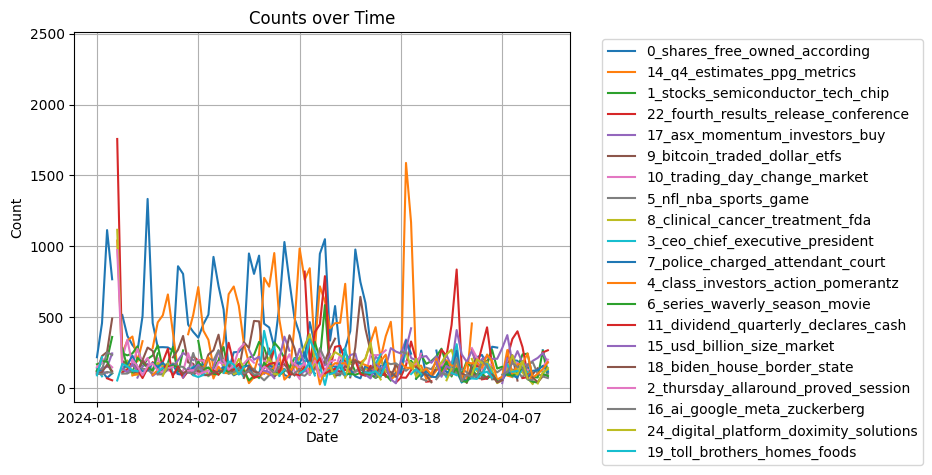

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 20))
cnt_df.pivot(index='Date', columns='Name', values='Count')[ts_df.groupby('Name')['Document'].count().sort_values(ascending=False)[:20].index].plot()
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Counts over Time')
plt.legend(loc='upper left',bbox_to_anchor=(1.05, 1))  # 调整图例位置
plt.grid(True)  # 添加网格线
plt.show()

In [ ]:
topic_info = merged_model.get_topic_info()
topic_info.to_csv(loading_dir+'topic_data/topic_info.csv', index=False)

In [ ]:
ts_df.to_csv(loading_dir+'topic_data/document_info.csv', index=False)

[]

In [ ]:
import os


# 列出目录下的所有文件和文件夹
# files_and_folders = os.listdir(loading_dir+"model_data/")
dates_in_files = [file[-10:] for file in os.listdir(loading_dir+"model_data/")]
dates_in_files.sort()
unfitted_dates=[date for date in all_dates if date not in dates_in_files]
unfitted_dates


[]

In [ ]:
for date in unfitted_dates:
  # break
  print(date)
  vectorizer_model=CountVectorizer(stop_words="english")
  umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)
  kmeans_model = KMeans(n_clusters=50)
  model=BERTopic(
          vectorizer_model=vectorizer_model,
          umap_model=umap_model,
          hdbscan_model=kmeans_model,
          verbose=False,
          )
  model.fit(documents[bisect.bisect_left(timestamp, date):bisect.bisect_right(timestamp, date)])
  model.save(loading_dir+"model_data/model_"+date, serialization="pickle")



# oline bertopic

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import IncrementalPCA
from bertopic.vectorizers import OnlineCountVectorizer

# Prepare sub-models that support online learning
umap_model = IncrementalPCA(n_components=5)
cluster_model = MiniBatchKMeans(n_clusters=50, random_state=0)
vectorizer_model = OnlineCountVectorizer(stop_words="english", decay=.01)

from bertopic import BERTopic

topic_model = BERTopic(umap_model=umap_model,hdbscan_model=cluster_model,vectorizer_model=vectorizer_model)
# Incrementally fit the topic model by training on 1000 documents at a time
topics=[]
for docs in tqdm(doc_chunks[:-1]):
  if len(docs)>0:
    topic_model.partial_fit(docs)
    topics.extend(topic_model.topics_)
topic_model.topics_=topics

100%|██████████| 90/90 [01:04<00:00,  1.40it/s]


In [ ]:
# load old model
loaded_model = BERTopic.load(loading_dir+"model_data/updated_model")

In [ ]:
topics_over_time = loaded_model.topics_over_time(documents[:bisect.bisect_left(timestamp, all_dates[-1])], timestamp[:bisect.bisect_left(timestamp, all_dates[-1])], nr_bins=20)
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=10)

In [ ]:
# train new data

from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import IncrementalPCA
from bertopic.vectorizers import OnlineCountVectorizer

# Prepare sub-models that support online learning
umap_model = IncrementalPCA(n_components=5)
cluster_model = MiniBatchKMeans(n_clusters=50, random_state=0)
vectorizer_model = OnlineCountVectorizer(stop_words="english", decay=.01)


from bertopic import BERTopic

# topic_model = BERTopic(umap_model=umap_model,hdbscan_model=cluster_model,vectorizer_model=vectorizer_model)
# Incrementally fit the topic model by training on 1000 documents at a time
topics=loaded_model.topics_
docs=documents[bisect.bisect_left(timestamp, all_dates[-1]):]



In [ ]:
if len(docs)>0:
  loaded_model.partial_fit(docs)
  topics.extend(loaded_model.topics_)
    # print(i)
loaded_model.topics_=topics

In [ ]:
topics_over_time = loaded_model.topics_over_time(documents, timestamp, nr_bins=20)
loaded_model.visualize_topics_over_time(topics_over_time, top_n_topics=10)

In [ ]:
# loaded_model = BERTopic.load(loading_dir+"model_data/updated_model")
current_date = datetime.now().strftime("%Y-%m-%d")
loaded_model.save(loading_dir+"model_data/updated_model", serialization="pickle")
loaded_model.save(loading_dir+"model_data/model_"+current_date, serialization="pickle")


2024-04-12 08:15:21,996 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.
2024-04-12 08:15:22,822 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


# display

In [ ]:
print("loading data...")
dataset = Dataset(loading_dir+'news_data/news_with_ticker.csv')
len(dataset)

loading data...


349715

In [ ]:
documents = [dataset[i][0] for i in range(len(dataset))]
timestamp = [dataset[i][1] for i in range(len(dataset))]
all_dates=sorted(np.unique(timestamp))
doc_chunks = [documents[bisect.bisect_left(timestamp, date):bisect.bisect_right(timestamp, date)] for date in all_dates]
date_chunks = [timestamp[bisect.bisect_left(timestamp, date):bisect.bisect_right(timestamp, date)] for date in all_dates]

In [ ]:
# 1. train first model using first 20 days
umap_model = IncrementalPCA(n_components=5)
cluster_model = MiniBatchKMeans(n_clusters=50)
vectorizer_model = OnlineCountVectorizer(stop_words="english", decay=.01)

topic_model = BERTopic(umap_model=umap_model,hdbscan_model=cluster_model,vectorizer_model=vectorizer_model)
docs=documents[:bisect.bisect_left(timestamp, all_dates[20])]
topics=[]
topic_model.partial_fit(docs)
topics.extend(topic_model.topics_)
topic_model.topics_=topics

topic_model.save(loading_dir+"model_data/updated_model", serialization="pickle")
topic_model.save(loading_dir+"model_data/first_model", serialization="pickle")

In [ ]:
topics_over_time = topic_model.topics_over_time(documents[:bisect.bisect_left(timestamp, all_dates[20])], timestamp[:bisect.bisect_left(timestamp, all_dates[20])], nr_bins=20)
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=10)

In [ ]:
# 2. update model every day
for i in tqdm(range(20, len(all_dates))):

  loaded_model = BERTopic.load(loading_dir+"model_data/updated_model")
  topics=loaded_model.topics_
  docs=doc_chunks[i]
  if len(docs)>0:
    loaded_model.partial_fit(docs)
    topics.extend(loaded_model.topics_)
  loaded_model.topics_=topics
  loaded_model.save(loading_dir+"model_data/updated_model", serialization="pickle")
  loaded_model.save(loading_dir+"model_data/model_"+all_dates[i], serialization="pickle")

In [ ]:
i=38
loaded_model = BERTopic.load(loading_dir+"model_data/model_"+all_dates[i])
topics_over_time = loaded_model.topics_over_time(documents[:bisect.bisect_left(timestamp, all_dates[i+1])], timestamp[:bisect.bisect_left(timestamp, all_dates[i+1])], nr_bins=20)
loaded_model.visualize_topics_over_time(topics_over_time, top_n_topics=10)

In [ ]:
i=40
loaded_model = BERTopic.load(loading_dir+"model_data/model_"+all_dates[i])
topics_over_time = loaded_model.topics_over_time(documents[:bisect.bisect_left(timestamp, all_dates[i+1])], timestamp[:bisect.bisect_left(timestamp, all_dates[i+1])], nr_bins=20)
loaded_model.visualize_topics_over_time(topics_over_time, top_n_topics=10)

In [ ]:
i=45
loaded_model = BERTopic.load(loading_dir+"model_data/model_"+all_dates[i])
topics_over_time = loaded_model.topics_over_time(documents[:bisect.bisect_left(timestamp, all_dates[i+1])], timestamp[:bisect.bisect_left(timestamp, all_dates[i+1])], nr_bins=20)
loaded_model.visualize_topics_over_time(topics_over_time, top_n_topics=10)

In [ ]:
i=46
loaded_model = BERTopic.load(loading_dir+"model_data/model_"+all_dates[i])
topics_over_time = loaded_model.topics_over_time(documents[:bisect.bisect_left(timestamp, all_dates[i+1])], timestamp[:bisect.bisect_left(timestamp, all_dates[i+1])], nr_bins=20)
loaded_model.visualize_topics_over_time(topics_over_time, top_n_topics=10)

In [ ]:
i=48
loaded_model = BERTopic.load(loading_dir+"model_data/model_"+all_dates[i])
topics_over_time = loaded_model.topics_over_time(documents[:bisect.bisect_left(timestamp, all_dates[i+1])], timestamp[:bisect.bisect_left(timestamp, all_dates[i+1])], nr_bins=20)
loaded_model.visualize_topics_over_time(topics_over_time, top_n_topics=10)